In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [3]:
data = pd.read_csv("Google_Stock_Price_Train.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [8]:
x_train = []
y_train = []

for i in range(60,1149):
    x_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1089, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100,return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer = 'adam',loss = "mean_squared_error")


In [11]:
hist = model.fit(x_train,y_train,epochs = 20,batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 7s - loss: 0.0295 - 7s/epoch - 205ms/step
Epoch 2/20
35/35 - 3s - loss: 0.0106 - 3s/epoch - 79ms/step
Epoch 3/20
35/35 - 3s - loss: 0.0098 - 3s/epoch - 78ms/step
Epoch 4/20
35/35 - 3s - loss: 0.0094 - 3s/epoch - 80ms/step
Epoch 5/20
35/35 - 3s - loss: 0.0092 - 3s/epoch - 84ms/step
Epoch 6/20
35/35 - 3s - loss: 0.0084 - 3s/epoch - 80ms/step
Epoch 7/20
35/35 - 3s - loss: 0.0079 - 3s/epoch - 82ms/step
Epoch 8/20
35/35 - 3s - loss: 0.0068 - 3s/epoch - 87ms/step
Epoch 9/20
35/35 - 3s - loss: 0.0064 - 3s/epoch - 87ms/step
Epoch 10/20
35/35 - 3s - loss: 0.0059 - 3s/epoch - 83ms/step
Epoch 11/20
35/35 - 3s - loss: 0.0056 - 3s/epoch - 87ms/step
Epoch 12/20
35/35 - 3s - loss: 0.0058 - 3s/epoch - 84ms/step
Epoch 13/20
35/35 - 3s - loss: 0.0055 - 3s/epoch - 82ms/step
Epoch 14/20
35/35 - 3s - loss: 0.0051 - 3s/epoch - 82ms/step
Epoch 15/20
35/35 - 3s - loss: 0.0047 - 3s/epoch - 77ms/step
Epoch 16/20
35/35 - 3s - loss: 0.0055 - 3s/epoch - 77ms/step
Epoch 17/20
35/35 - 3s - loss: 0

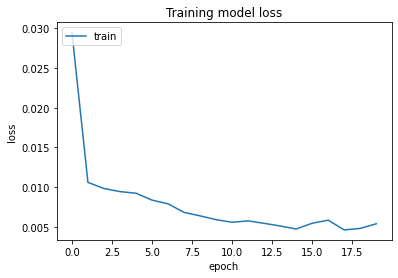

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [17]:
testData = pd.read_csv('Google_Stock_Price_Train.csv')
testData["Close"] = pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values

inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(1089, 60, 1)

In [14]:
y_pred = model.predict(x_test)
df = pd.DataFrame(y_pred,columns = ['Predicted stock Value'])
print(df)

35/35 [==============================] - 2s 22ms/step
      Predicted stock Value
0                  0.370618
1                  0.376241
2                  0.378724
3                  0.378692
4                  0.376664
...                     ...
1084               0.727715
1085               0.723856
1086               0.720058
1087               0.715877
1088               0.711073

[1089 rows x 1 columns]


In [15]:
predicted_price = sc.inverse_transform(y_pred)

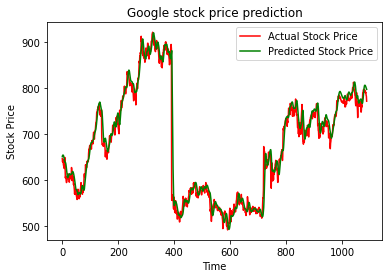

In [16]:
plt.plot(y_test,color='red',label='Actual Stock Price')
plt.plot(predicted_price,color='green',label='Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()